<div style="text-align: center;">
    <h1 style="color: #3498db;">Artificial Intelligence & Machine Learning</h1>
    <h2 style="color: #3498db;">Part 1: Evaluation metrics for classification</h2>
</div>

-------------------------------------------------------------

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Authors:</b> K. Said<br>
    <b>Date:</b> 08-09-2023
</div>

<div style="background-color: #e6e6e6; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p>This notebook is part of the "Artificial Intelligence & Machine Learning" lecture material. The following copyright statement applies to all contents and code within this file.</p>
    <b>Copyright statement:</b>
    <p>This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors and lecturers.</p>
</div>


<h1 style="color:rgb(0,120,170)">Introduction</h1>

-----------------------------------------------

<h2 style="color:rgb(0,120,0)">What you have learned so far</h2>

--------------------------------------------------------------------

In the last exercise we were introduced to the topic of Over-and Underfitting. We learned how Over- or Underfitting can happen, how to avoid some of the pitfals and also how to detect it. Now that we are done with that, we still have a few little steps left to fully understand the Machine Learning Process.


<h2 style="color:rgb(0,120,0)">Our Task</h2>

-------------------------------------------------

In the Module 4 Notebooks you will learn more about different evaluation metrics for classification, regression and clustering. We will start by first providing you with some prediction, which we will evaluate step-by-step.
Afterwards, it will be your turn to try other evaluation metrics.

<h1 style="color:rgb(0,120,170)">Evaluation for classification - Example</h1>

In this section we will provide you with some predictions on the breast cancer dataset. We will show you some of the things you might have learned during the lecture and explain how to calculate them. In the next section, you can then try to apply the things from this section on your own dataset. Now without further ado, let's get started.

**Sidenote**: The breast cancer dataset is freely available on kaggle. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

np.random.seed(42) # DO NOT CHANGE

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Make predictions</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   In this step we will simply load our example dataset and make a train-test-split (as we have already learned in the previous notebooks). Afterwards we load a Support Vector Classifier and make predictions on the dataset.
</div>
</details>


In [2]:
# Load the Breast Cancer dataset and make Train-Test-Split
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Trainingset Length: {len(X_train)}, Testset Length: {len(X_test)}")


Trainingset Length: 398, Testset Length: 171


In [3]:
# Create and train a Support Vector Machine (SVM) Classifier and make predictions on the test set
clf = SVC(probability=True)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


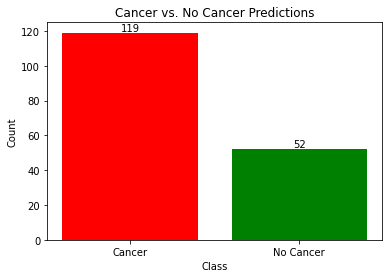

In [4]:
# Lets do a simple plot
cancer_count = (predictions == 1).sum()
no_cancer_count = (predictions == 0).sum()
labels = ['Cancer', 'No Cancer']
counts = [cancer_count, no_cancer_count]
plt.bar(labels, counts, color=['red', 'green'])

for i in range(len(counts)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.title('Cancer vs. No Cancer Predictions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    According to our prediction, we have approx. 119 cancer cases and 52 and classified as no-cancer. Now it's our task to check wether this predictions are correct or not.
</div>

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">TP, TN, FP, FN and Confusion Matrix</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   One way of evaluating the performance of a model would be through a confusion matrix, where one is able to see the amount of truly predicted values vs the amount of falsely predicted values. 
   
    
</div>
</details>


True Positives (TP): 108
True Negatives (TN): 52
False Positives (FP): 11
False Negatives (FN): 0


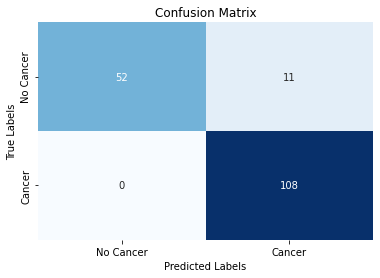

In [5]:
# Calculate TP, TN, FP, FN
tp = np.sum((predictions == 1) & (y_test == 1))
tn = np.sum((predictions == 0) & (y_test == 0))
fp = np.sum((predictions == 1) & (y_test == 0))
fn = np.sum((predictions == 0) & (y_test == 1))

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

conf_matrix = confusion_matrix(y_test, predictions)
class_labels = ["No Cancer", "Cancer"]

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    Having a look at our prediction results, we predicted a total of 160 correct values (True Positives and True Negatives). Our model also falsely predicted 11 values as Cancer, even though the correct class would have been No cancer. In a real-life scenario this probably would have caused doctors to check the patient again. However, we also see that our model did not falsely predict "No Cancer", which is a good message. Why? A miss may be much more expensive than a false alarm.
</div>

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Accuracy, Precision, Recall, and F1-Score</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
    When usually evaluating the performance of different models and trying to compare them, we don't always want to create confusion matrices. Instead we use other evaluation metrics such as accuracy, one of the most widespread metrics. However, there are also many others, but for simplicity, we will only focus on 4                          
    
1. $\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Population}}$

    
2. $\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

    
3. $\text{Recall (True Positive Rate)} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

    
4. $\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

</div>
</details>


In [6]:
# Calculate all 4 evaluation metrics based on previous predictions
# For simplicity we use sklearn predefined metrics
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy:.2f}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, predictions)
print(f"F1-score: {f1:.2f}")



Accuracy: 0.94
Precision: 0.91
Recall: 1.00
F1-score: 0.95


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    Quite interesting, all 4 measures have different results. This is one of the reasons why one should never only rely on 1 evaluation metric when trying to compare the model performances. Usually one should use 2-3 different metrics during the training and evaluation process, as different metrics have different use-cases.
</div>

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">ROC vs AUC</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   As you have learned in the lecture, another way of evaluation would be by creating ROC curves and calculating the underlying area, called AUC. Luckily sklearn provides us with a wide range of predefined ML functions, so we don't have to calculate all by ourself.
</div>
</details>


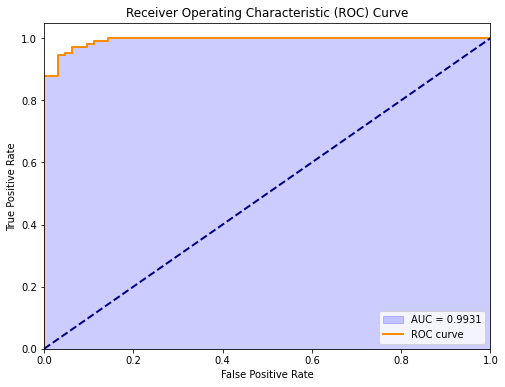

In [7]:
# Calculate ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.fill_between(fpr, tpr, color='blue', alpha=0.2, label= f"AUC = {roc_auc:.4f}")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    Our AUC is 0.9931, this is almost a perfect result, indicating that our classifier performs very good on this dataset. Since this was only a relatively simple dataset, this shouldn't surprise us.
</div>

<h1 style="color:rgb(0,120,170)">Evaluation for classification - Your turn</h1>

Now in this section, try to use some of the evaluation metrics above on the predictions of your dataset.
For this, you can load the model just as above. Fit your preprocessed data into the model and create some example predictions. If you want to be more creative, you could also load a second model, and try to compare their performances using different metrics.